# Setup

In [1]:
import bizwiz

path_manager = bizwiz.PathManager(
    data_dir = "../data/comtrade/"
)

# Find Countries

In [7]:
from bizwiz.trade import search_codes
countries = [
    'sweden',
    'canada',
    'united states',
    'china',
    'india',
    'germany',
    'france',
]

country_search = search_codes.get_country_codes(keywords=countries, filepath='../data/comtrade/iso_country_codes.csv')
display(country_search)

,name,iso,comtrade_query,keyword
0,Sweden,SWE,752,sweden
1,Canada,CAN,124,canada
2,United States of America,USA,"840,842,841",united states
3,China,CHN,156,china
4,India,IND,"699,356",india
5,Germany,DEU,"280,276",germany
6,France,FRA,"251,250",france


# Find HS Code

In [8]:
from bizwiz.trade import search_codes
chemicals = [
    'caustic',
    'h2so4',
    'na2so4',
    'potassium sulphate',
    'potassium chloride'
]

hs_search = search_codes.get_hs_codes(keywords=chemicals)
display(hs_search)
display(hs_search['id'].tolist())

,id,score,text,rank,reasoning,chemical_name,keyword
0,281511,90,281511 - Sodium hydroxide (caustic soda); solid,1,Sodium hydroxide is the more commonly known ca...,sodium_hydroxide,caustic
1,2807,95,Sulfuric acid,1,"This is the most accurate HS Code for h2so4, d...",sulfuric_acid,h2so4
2,2833,95,Sodium sulfate,1,"Most relevant HS code for sodium sulfate, high...",sodium_sulfate,na2so4
3,310430,90,"310430 - Fertilizers, mineral or chemical; pot...",1,This HS Code specifically mentions potassium s...,potassium sulphate,potassium sulphate
4,310420,90,"310420 - Fertilizers, mineral or chemical; pot...",1,This code specifically mentions potassium chlo...,potassium chloride,potassium chloride


['281511', '2807', '2833', '310430', '310420']

# Trade Data by country + year

In [4]:
from bizwiz.trade import search_data
api_key = "b1a3f42948df4538a17418bdfdc5574a"

dataset = search_data.get_trade_data(
    api_key=api_key,
    hs_codes=['2807','281511'],
    country_code = 'CAN',
    year = 2024,
)


,date,iso,partner,price,mass,value,qty,qty_units,qty_unit_code,aggrLevel,...,qtyUnitCode,refMonth,refPeriodId,refYear,reporterCode,reporterDesc,reporterISO,typeCode,kind,hs_code
0,2024-01-01,CAN,W00,0.173783,6611039.0,1148885.916,6611039.0,kg,8,4,...,8,1,20240101,2024,124,Canada,CAN,C,import,2807
1,2024-01-01,CAN,AUT,128.315500,4.0,513.262,4.0,kg,8,4,...,8,1,20240101,2024,124,Canada,CAN,C,import,2807
2,2024-01-01,CAN,BEL,31.217738,107.0,3340.298,107.0,kg,8,4,...,8,1,20240101,2024,124,Canada,CAN,C,import,2807
3,2024-01-01,CAN,CAN,291.270500,2.0,582.541,2.0,kg,8,4,...,8,1,20240101,2024,124,Canada,CAN,C,import,2807
4,2024-01-01,CAN,HRV,5.817603,189.0,1099.527,189.0,kg,8,4,...,8,1,20240101,2024,124,Canada,CAN,C,import,2807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2024-02-01,CAN,USA,1.136678,90809.0,103220.549,90809.0,kg,8,6,...,8,2,20240201,2024,124,Canada,CAN,C,export,281511
3,2024-04-01,CAN,W00,2.450845,1975.0,4840.418,1975.0,kg,8,6,...,8,4,20240401,2024,124,Canada,CAN,C,export,281511
4,2024-04-01,CAN,USA,2.450845,1975.0,4840.418,1975.0,kg,8,6,...,8,4,20240401,2024,124,Canada,CAN,C,export,281511
5,2024-06-01,CAN,W00,0.269723,303.0,81.726,303.0,kg,8,6,...,8,6,20240601,2024,124,Canada,CAN,C,export,281511


In [14]:
from bizwiz import trade_data
from bizwiz.trade.dags import find_country_data
filepath='../data/comtrade/iso_country_codes.csv'
country_df =find_country_data.country_codes(filepath)

#concatenate and clean more
import pandas as pd
df = pd.DataFrame()
for data in dataset:
    _df = pd.concat([
        data['import'],
        data['export']
    ])
    _df['hs_code'] = data['hs_code']
    df = pd.concat([df,_df])
df = trade_data.remove_unkown_partners(df, country_df)

## compute price metrics from subset of annual data
# - filter dates
start_date=''
end_date=''

# - compute metrics
# -- from a combined df

# - add metrics to a summary df
# -- code, country, price, mass

# - merge code with name
df

,date,iso,partner,price,mass,value,qty,qty_units,qty_unit_code,aggrLevel,...,alpha-2,alpha-3,country-code,intermediate-region,intermediate-region-code,iso_3166-2,region,region-code,sub-region,sub-region-code
1,2024-01-01,CAN,AUT,128.315500,4.0,513.262,4.0,kg,8,4,...,CA,CAN,124,NaN,NaN,ISO 3166-2:CA,Americas,19.0,Northern America,21.0
2,2024-01-01,CAN,BEL,31.217738,107.0,3340.298,107.0,kg,8,4,...,CA,CAN,124,NaN,NaN,ISO 3166-2:CA,Americas,19.0,Northern America,21.0
3,2024-01-01,CAN,CAN,291.270500,2.0,582.541,2.0,kg,8,4,...,CA,CAN,124,NaN,NaN,ISO 3166-2:CA,Americas,19.0,Northern America,21.0
4,2024-01-01,CAN,HRV,5.817603,189.0,1099.527,189.0,kg,8,4,...,CA,CAN,124,NaN,NaN,ISO 3166-2:CA,Americas,19.0,Northern America,21.0
5,2024-01-01,CAN,DEU,2.294887,124.0,284.566,124.0,kg,8,4,...,CA,CAN,124,NaN,NaN,ISO 3166-2:CA,Americas,19.0,Northern America,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2024-07-01,CAN,USA,0.454794,1534549.0,697903.889,1534549.0,kg,8,6,...,CA,CAN,124,NaN,NaN,ISO 3166-2:CA,Americas,19.0,Northern America,21.0
181,2024-02-01,CAN,DNK,0.283206,34.0,9.629,34.0,kg,8,6,...,CA,CAN,124,NaN,NaN,ISO 3166-2:CA,Americas,19.0,Northern America,21.0
182,2024-02-01,CAN,USA,1.136678,90809.0,103220.549,90809.0,kg,8,6,...,CA,CAN,124,NaN,NaN,ISO 3166-2:CA,Americas,19.0,Northern America,21.0
184,2024-04-01,CAN,USA,2.450845,1975.0,4840.418,1975.0,kg,8,6,...,CA,CAN,124,NaN,NaN,ISO 3166-2:CA,Americas,19.0,Northern America,21.0


# ---- Develop DAG

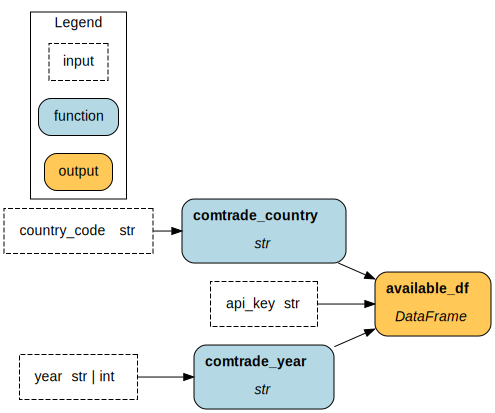

In [6]:
import importlib
from hamilton import driver
from bizwiz.trade.dags import find_available_data
importlib.reload(find_available_data)

api_key = "b1a3f42948df4538a17418bdfdc5574a"

#build graph
dr =  driver.Builder().with_modules(find_available_data).build()

#execute
final_vars = ["available_df",]
inputs = {  
    'country_code' : 'USA',
    'year' : 2023,
    'api_key' : api_key,
}
overrides =  {}

dag_execute = dr.visualize_execution(
    final_vars=final_vars,
    inputs=inputs,
    overrides=overrides,
)
display(dag_execute)

In [7]:
results = dr.execute(
    final_vars=final_vars,
    inputs=inputs,
    overrides=overrides,
)
display(list(results.keys()))
available_df = results['available_df'].copy()

['available_df']